In [348]:
#imports

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()




from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Libraries and Functions For Regression  ##
# from sklearn.utils import check_array
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR, LinearSVR


## Libraries and Functions For Classification ##
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, plot_confusion_matrix
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression




In [349]:
import os
import pandas as pd


def load_data(path, col_names=None, n_data_sets=4):
    if col_names is None:
        col_names = ["unit_num", "cycle_time", "os1", "os2", "os3"]
        col_names += ["sensor_{0:02d}".format(j+1) for j in range(0,26)]
        
    df = {}
    
    
    for i in range(n_data_sets):
        p = os.path.join(path, 'train_FD00{}.txt'.format(i+1))
        df_train = pd.read_csv(p, sep= ' ', header=None, names=col_names, index_col=False)
        
        p = os.path.join(path, 'test_FD00{}.txt'.format(i+1))
        df_test = pd.read_csv(p, sep= ' ', header=None, names=col_names, index_col=False)
        
        p = os.path.join(path, 'RUL_FD00{}.txt'.format(i+1))
        df_RUL = pd.read_csv(p, sep= ' ', header=None, names=['RUL_actual'], index_col=False)
        
        s = 'FD_00{}'.format(i+1)
        
        df[s] = {'df_train': df_train, 'df_test': df_test, 'df_RUL': df_RUL}
        
    return df

In [350]:
dirname = os.getcwd()
path = os.path.join(dirname, "CMAPSSData")
dc = load_data(path=path)
df = dc['FD_001']['df_train'].copy()
df_base = df.copy()
df.head()


unit_num  cycle_time     os1     os2    os3  sensor_01  sensor_02  \
0         1           1 -0.0007 -0.0004  100.0     518.67     641.82   
1         1           2  0.0019 -0.0003  100.0     518.67     642.15   
2         1           3 -0.0043  0.0003  100.0     518.67     642.35   
3         1           4  0.0007  0.0000  100.0     518.67     642.35   
4         1           5 -0.0019 -0.0002  100.0     518.67     642.37   

   sensor_03  sensor_04  sensor_05  ...  sensor_17  sensor_18  sensor_19  \
0    1589.70    1400.60      14.62  ...        392       2388      100.0   
1    1591.82    1403.14      14.62  ...        392       2388      100.0   
2    1587.99    1404.20      14.62  ...        390       2388      100.0   
3    1582.79    1401.87      14.62  ...        392       2388      100.0   
4    1582.85    1406.22      14.62  ...        393       2388      100.0   

   sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  sensor_25  sensor_26  
0      39.06    23.4190        NaN        NaN        NaN        NaN        NaN  
1      39.00    23.4236        NaN        NaN        NaN        NaN        NaN  
2      38.95    23.3442        NaN        NaN        NaN        NaN        NaN  
3      38.88    23.3739        NaN        NaN        NaN        NaN        NaN  
4      38.90    23.4044        NaN        NaN        NaN        NaN        NaN  

[5 rows x 31 columns]

In [351]:
df.describe()

unit_num    cycle_time           os1           os2      os3  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

          sensor_01     sensor_02     sensor_03     sensor_04     sensor_05  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

       ...     sensor_17  sensor_18  sensor_19     sensor_20     sensor_21  \
count  ...  20631.000000    20631.0    20631.0  20631.000000  20631.000000   
mean   ...    393.210654     2388.0      100.0     38.816271     23.289705   
std    ...      1.548763        0.0        0.0      0.180746      0.108251   
min    ...    388.000000     2388.0      100.0     38.140000     22.894200   
25%    ...    392.000000     2388.0      100.0     38.700000     23.221800   
50%    ...    393.000000     2388.0      100.0     38.830000     23.297900   
75%    ...    394.000000     2388.0      100.0     38.950000     23.366800   
max    ...    400.000000     2388.0      100.0     39.430000     23.618400   

       sensor_22  sensor_23  sensor_24  sensor_25  sensor_26  
count        0.0        0.0        0.0        0.0        0.0  
mean         NaN        NaN        NaN        NaN        NaN  
std          NaN        NaN        NaN        NaN        NaN  
min          NaN        NaN        NaN        NaN        NaN  
25%          NaN        NaN        NaN        NaN        NaN  
50%          NaN        NaN        NaN        NaN        NaN  
75%          NaN        NaN        NaN        NaN        NaN  
max          NaN        NaN        NaN        NaN        NaN  

[8 rows x 31 columns]

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unit_num    20631 non-null  int64  
 1   cycle_time  20631 non-null  int64  
 2   os1         20631 non-null  float64
 3   os2         20631 non-null  float64
 4   os3         20631 non-null  float64
 5   sensor_01   20631 non-null  float64
 6   sensor_02   20631 non-null  float64
 7   sensor_03   20631 non-null  float64
 8   sensor_04   20631 non-null  float64
 9   sensor_05   20631 non-null  float64
 10  sensor_06   20631 non-null  float64
 11  sensor_07   20631 non-null  float64
 12  sensor_08   20631 non-null  float64
 13  sensor_09   20631 non-null  float64
 14  sensor_10   20631 non-null  float64
 15  sensor_11   20631 non-null  float64
 16  sensor_12   20631 non-null  float64
 17  sensor_13   20631 non-null  float64
 18  sensor_14   20631 non-null  float64
 19  sensor_15   20631 non-nul

In [353]:
na_list = df.columns[df.isna().any()].tolist()
const_list = [col for col in df.columns if len(df[col].unique()) <= 1] 
print(na_list)
print(const_list)

['sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26']
['os3', 'sensor_01', 'sensor_05', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26']


# Removed columns which has same values or NaN

In [354]:
df_base = df.copy()
df.drop(columns=na_list+const_list,axis=1, inplace=True)

In [355]:
df.describe()

unit_num    cycle_time           os1           os2     sensor_02  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean      51.506568    108.807862     -0.000009      0.000002    642.680934   
std       29.227633     68.880990      0.002187      0.000293      0.500053   
min        1.000000      1.000000     -0.008700     -0.000600    641.210000   
25%       26.000000     52.000000     -0.001500     -0.000200    642.325000   
50%       52.000000    104.000000      0.000000      0.000000    642.640000   
75%       77.000000    156.000000      0.001500      0.000300    643.000000   
max      100.000000    362.000000      0.008700      0.000600    644.530000   

          sensor_03     sensor_04     sensor_06     sensor_07     sensor_08  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean    1590.523119   1408.933782     21.609803    553.367711   2388.096652   
std        6.131150      9.000605      0.001389      0.885092      0.070985   
min     1571.040000   1382.250000     21.600000    549.850000   2387.900000   
25%     1586.260000   1402.360000     21.610000    552.810000   2388.050000   
50%     1590.100000   1408.040000     21.610000    553.440000   2388.090000   
75%     1594.380000   1414.555000     21.610000    554.010000   2388.140000   
max     1616.910000   1441.490000     21.610000    556.060000   2388.560000   

          sensor_09     sensor_11     sensor_12     sensor_13     sensor_14  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean    9065.242941     47.541168    521.413470   2388.096152   8143.752722   
std       22.082880      0.267087      0.737553      0.071919     19.076176   
min     9021.730000     46.850000    518.690000   2387.880000   8099.940000   
25%     9053.100000     47.350000    520.960000   2388.040000   8133.245000   
50%     9060.660000     47.510000    521.480000   2388.090000   8140.540000   
75%     9069.420000     47.700000    521.950000   2388.140000   8148.310000   
max     9244.590000     48.530000    523.380000   2388.560000   8293.720000   

          sensor_15     sensor_17     sensor_20     sensor_21  
count  20631.000000  20631.000000  20631.000000  20631.000000  
mean       8.442146    393.210654     38.816271     23.289705  
std        0.037505      1.548763      0.180746      0.108251  
min        8.324900    388.000000     38.140000     22.894200  
25%        8.414900    392.000000     38.700000     23.221800  
50%        8.438900    393.000000     38.830000     23.297900  
75%        8.465600    394.000000     38.950000     23.366800  
max        8.584800    400.000000     39.430000     23.618400

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unit_num    20631 non-null  int64  
 1   cycle_time  20631 non-null  int64  
 2   os1         20631 non-null  float64
 3   os2         20631 non-null  float64
 4   sensor_02   20631 non-null  float64
 5   sensor_03   20631 non-null  float64
 6   sensor_04   20631 non-null  float64
 7   sensor_06   20631 non-null  float64
 8   sensor_07   20631 non-null  float64
 9   sensor_08   20631 non-null  float64
 10  sensor_09   20631 non-null  float64
 11  sensor_11   20631 non-null  float64
 12  sensor_12   20631 non-null  float64
 13  sensor_13   20631 non-null  float64
 14  sensor_14   20631 non-null  float64
 15  sensor_15   20631 non-null  float64
 16  sensor_17   20631 non-null  int64  
 17  sensor_20   20631 non-null  float64
 18  sensor_21   20631 non-null  float64
dtypes: float64(16), int64(3)


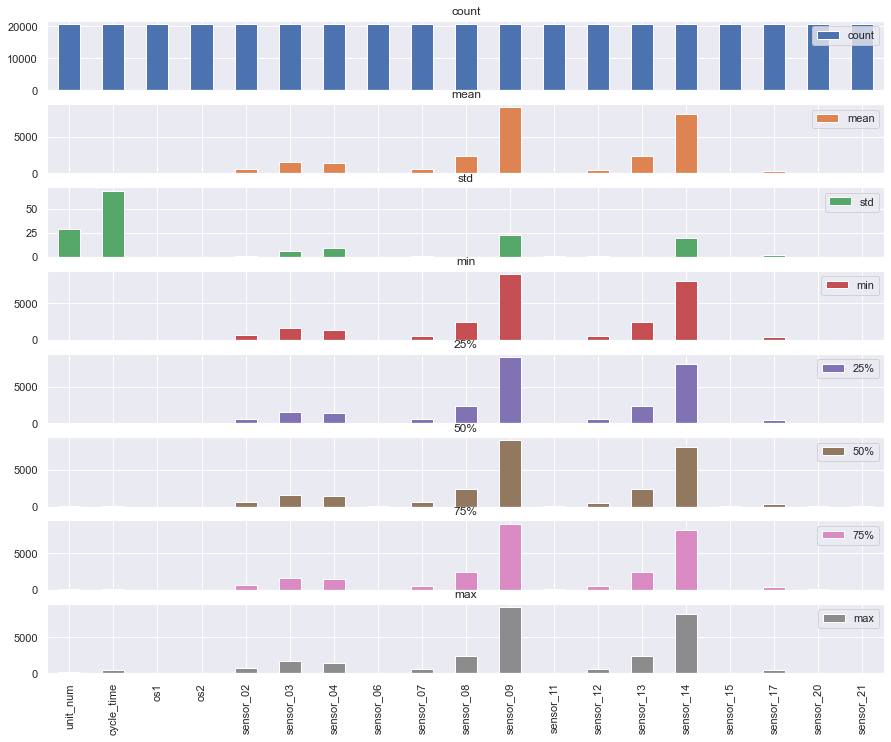

In [357]:
desc_plot = df.describe().T.plot.bar(subplots=True, figsize=(15,12))

# Creating RUL Columns For Engines

In [358]:
units = df_base["unit_num"].unique().tolist()
dicti = {}
for i in units:
    dicti[i] = df_base[df_base["unit_num"] == i]["cycle_time"].max() 
df_base["RUL"] = df_base["unit_num"].apply(lambda key: dicti[key]) - df_base["cycle_time"]

In [359]:
df_base['RUL'].head(10)
df_base["RUL"]

0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: RUL, Length: 20631, dtype: int64

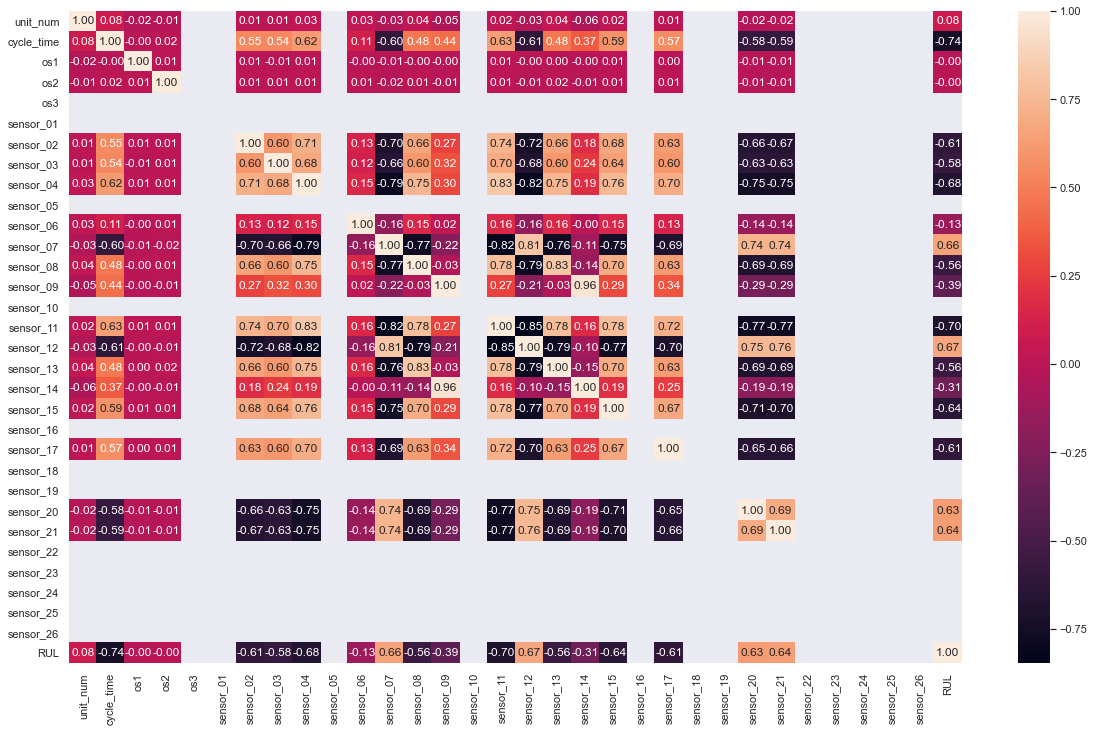

In [360]:
plt.figure(figsize=(20,12))
sns.heatmap(df_base.corr(), annot=True, fmt='.2f')
plt.show()

In [361]:
units = df["unit_num"].unique().tolist()
dicti = {}
for i in units:
    dicti[i] = df[df["unit_num"] == i]["cycle_time"].max()    
df["RUL"] = df["unit_num"].apply(lambda key: dicti[key]) - df["cycle_time"]

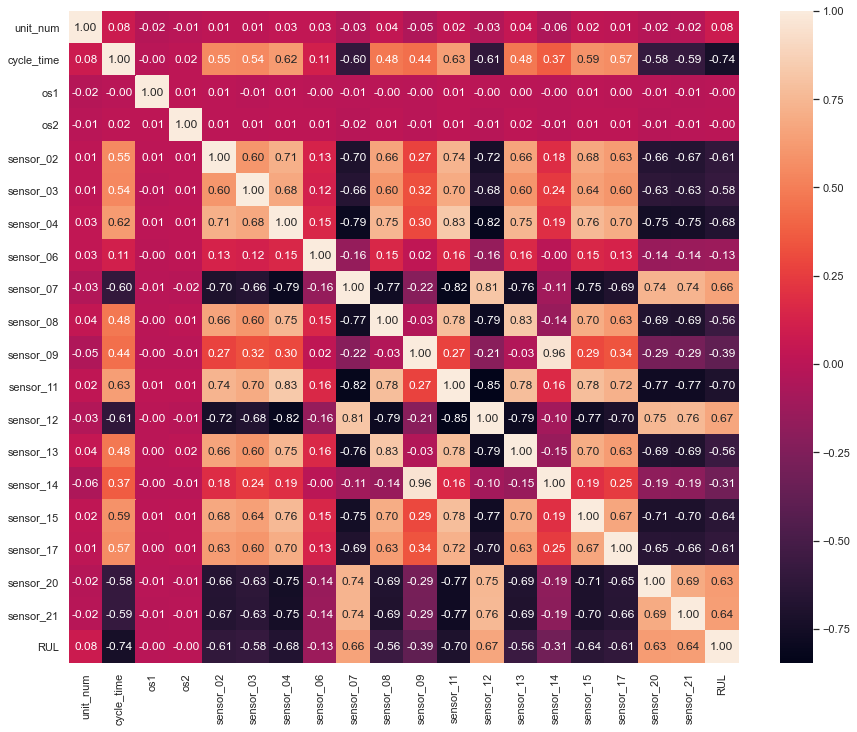

In [362]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# corr. check 

In [363]:
corr_mat = df.drop(['unit_num','cycle_time'], axis=1).corr()  #Removing Unit_num and cycles time due to direct relation to values
high_corr = []
for i in corr_mat.columns:
    for j in range(len(corr_mat)):
        if corr_mat[i].iloc[j]>0.8 or corr_mat[i].iloc[j] < -0.8 :
            if i == corr_mat.index[j] or (corr_mat.index[j], i, corr_mat[i].iloc[j]) in high_corr:
                continue
            else:
                high_corr.append((i, corr_mat.index[j], corr_mat[i].iloc[j]))          
high_corr

[('sensor_04', 'sensor_11', 0.8301356963159815),
 ('sensor_04', 'sensor_12', -0.815590516105214),
 ('sensor_07', 'sensor_11', -0.8228050249957691),
 ('sensor_07', 'sensor_12', 0.812712601325414),
 ('sensor_08', 'sensor_13', 0.8260843322333569),
 ('sensor_09', 'sensor_14', 0.9631566003059776),
 ('sensor_11', 'sensor_12', -0.8468835930051095)]

In [364]:
# checking relation bet. RUL and high corr. sensors 

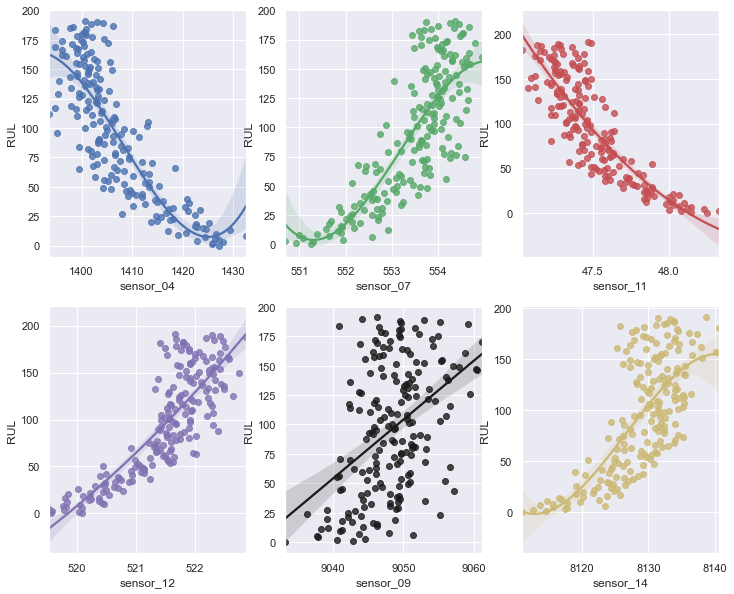

In [365]:
  df_unit_1 = df[df["unit_num"] == 1]

fig, axes = plt.subplots(2,3)
fig.set_size_inches(12,10)

sns.regplot(x="sensor_04", y="RUL", data=df_unit_1, ax= axes[0][0], order=3)
sns.regplot(x="sensor_07", y="RUL", data=df_unit_1, ax= axes[0][1], order=3, color ='g')
sns.regplot(x="sensor_11", y="RUL", data=df_unit_1, ax= axes[0][2], order=2, color = 'r')
sns.regplot(x="sensor_12", y="RUL", data=df_unit_1, ax= axes[1][0], order=2, color = 'm')
sns.regplot(x="sensor_09", y="RUL", data=df_unit_1, ax= axes[1][1], color = 'k')
sns.regplot(x="sensor_14", y="RUL", data=df_unit_1, ax= axes[1][2], order=3, color = 'y')

plt.show()


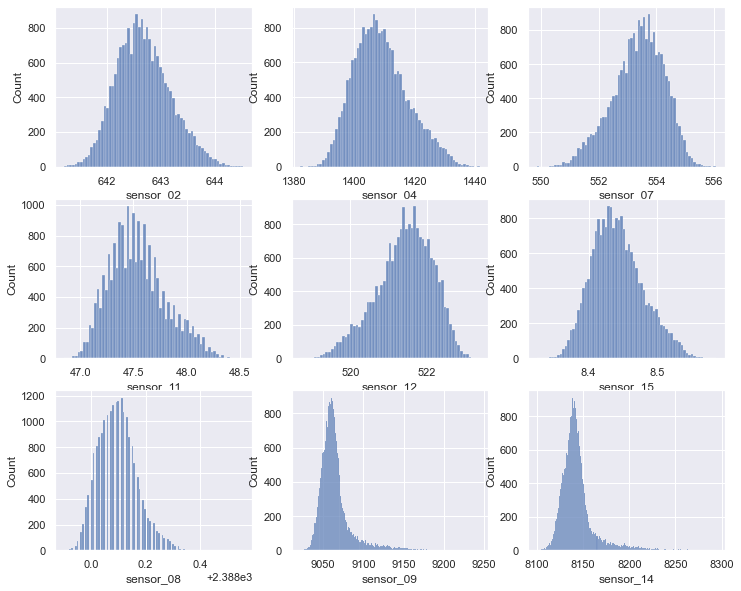

In [366]:
fig, axes = plt.subplots(3,3)
fig.set_size_inches(12,10)

sns.histplot(df["sensor_02"], ax= axes[0][0])
sns.histplot(df["sensor_04"], ax= axes[0][1])
sns.histplot(df["sensor_07"], ax= axes[0][2])
sns.histplot(df["sensor_11"], ax= axes[1][0])
sns.histplot(df["sensor_12"], ax= axes[1][1])
sns.histplot(df["sensor_15"], ax= axes[1][2])
sns.histplot(df["sensor_08"], ax= axes[2][0])
sns.histplot(df["sensor_09"], ax= axes[2][1])
sns.histplot(df["sensor_14"], ax= axes[2][2])

plt.show()

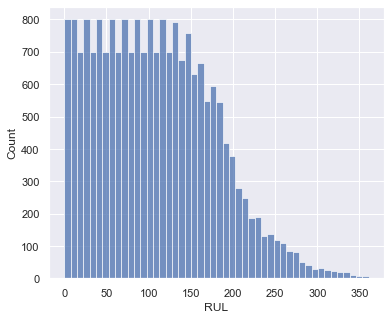

In [367]:
fig, axes = plt.subplots()
fig.set_size_inches(6,5)

sns.histplot(df["RUL"])

plt.show()

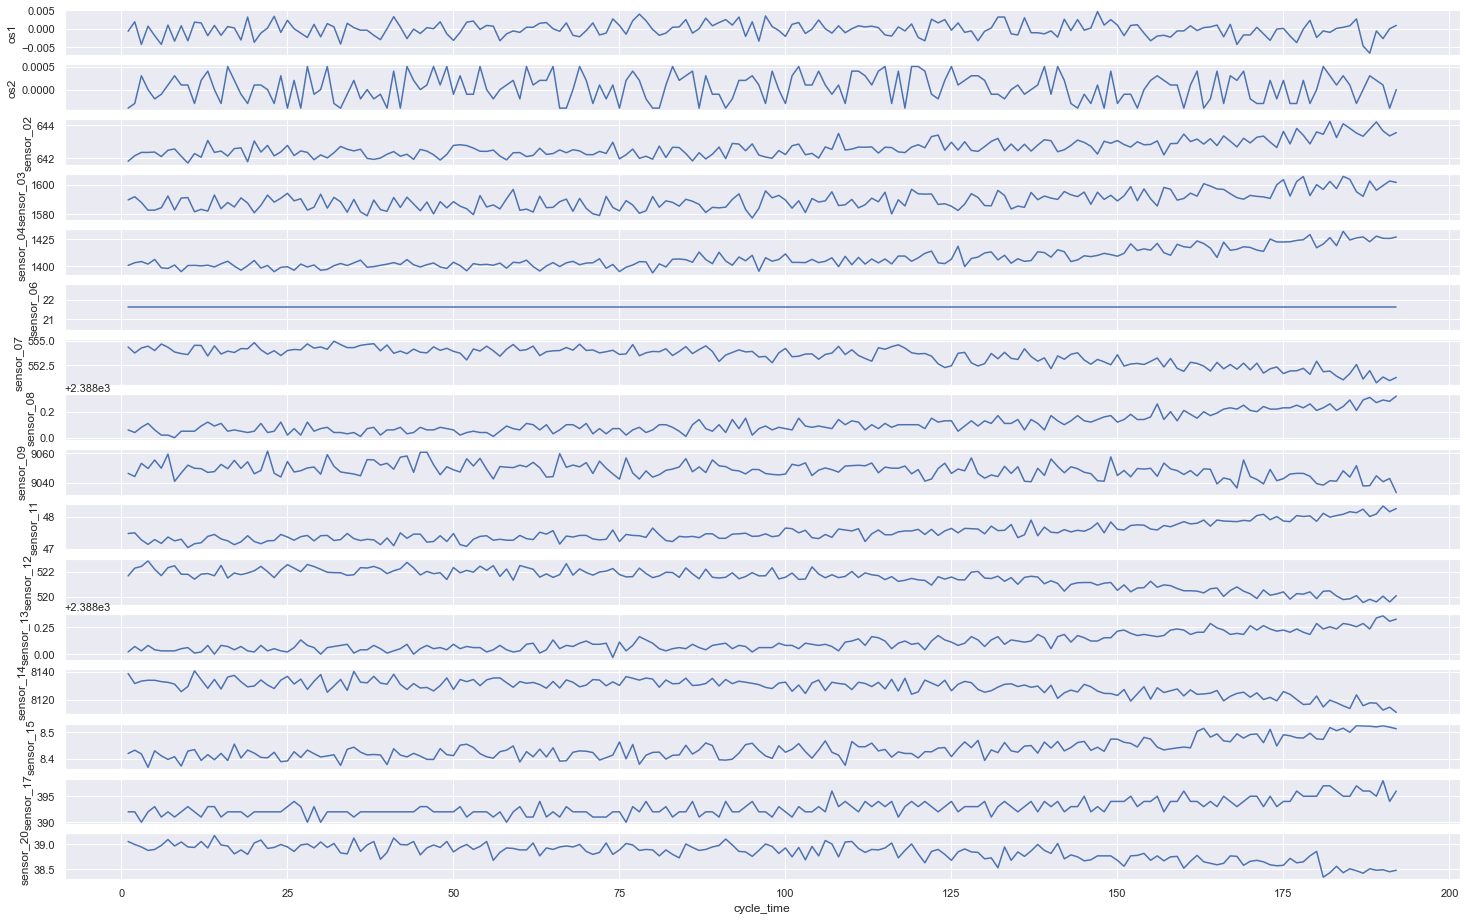

In [368]:
fig, axes = plt.subplots(16,1)
fig.set_size_inches(25,16)
sns.set_context("paper", font_scale=1)   

for ax1,j in zip(axes.flatten(),df_unit_1.columns[2:-1]):
    sns.lineplot(x=df_unit_1["cycle_time"], y=df_unit_1[j], linewidth=1.5, ax=ax1)

plt.show()

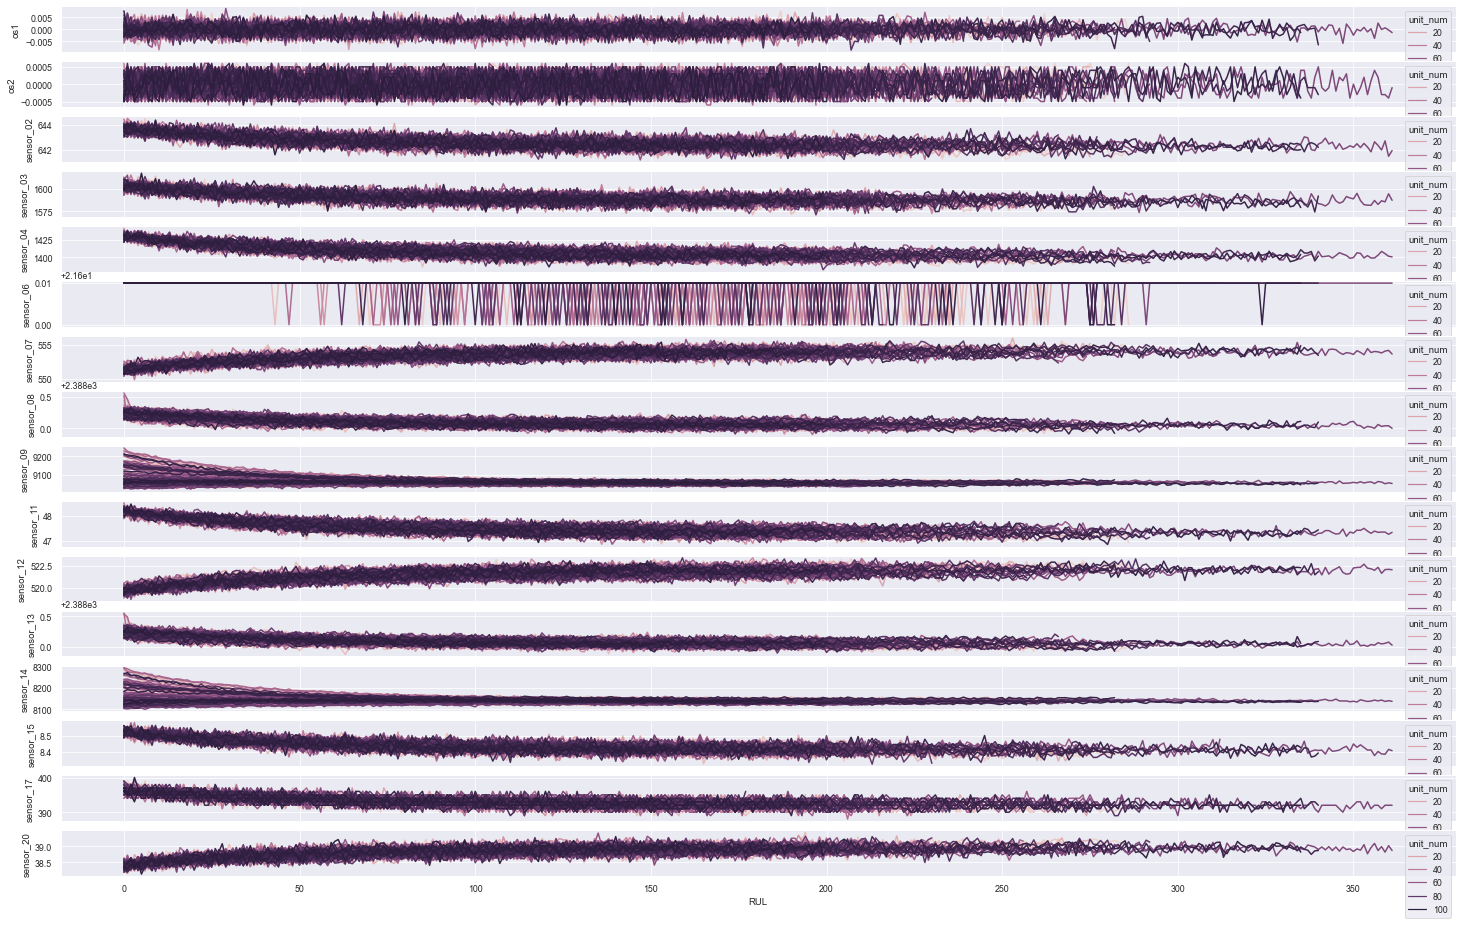

In [369]:
df_unit_6 = df[df["unit_num"]==6]

fig, axes = plt.subplots(16,1)
fig.set_size_inches(25,16)
sns.set_context("paper", font_scale=1)   

for ax1,j in zip(axes.flatten(),df.columns[2:-1]):
    sns.lineplot(x=df["RUL"].sort_values(ascending=False), y=df[j], hue=df["unit_num"], linewidth=1.5, ax=ax1)

plt.show()

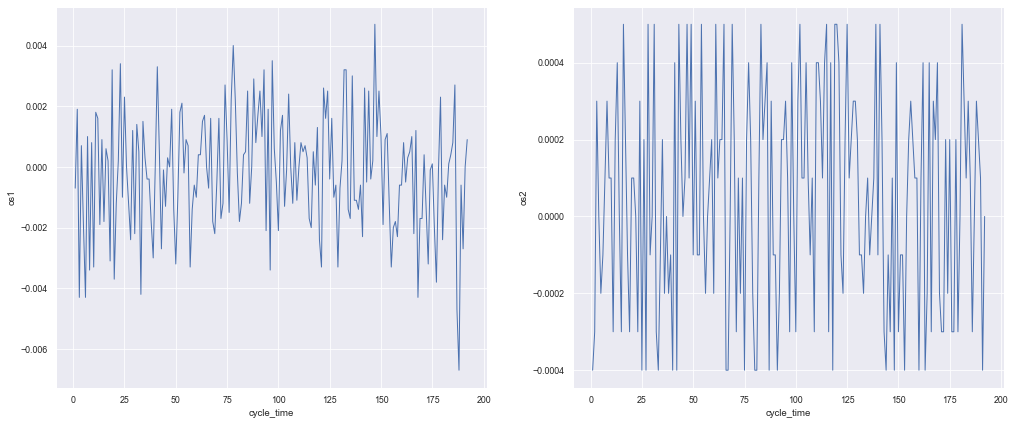

In [370]:
fig1, axes1 = plt.subplots(1,2)
fig1.set_size_inches(17,7)

sns.set_context("paper", font_scale=1)

sns.lineplot(x=df_unit_1["cycle_time"], y=df_unit_1["os1"], linewidth=1, ax=axes1[0])
sns.lineplot(x=df_unit_1["cycle_time"], y=df_unit_1["os2"], linewidth=1, ax=axes1[1])

plt.show()

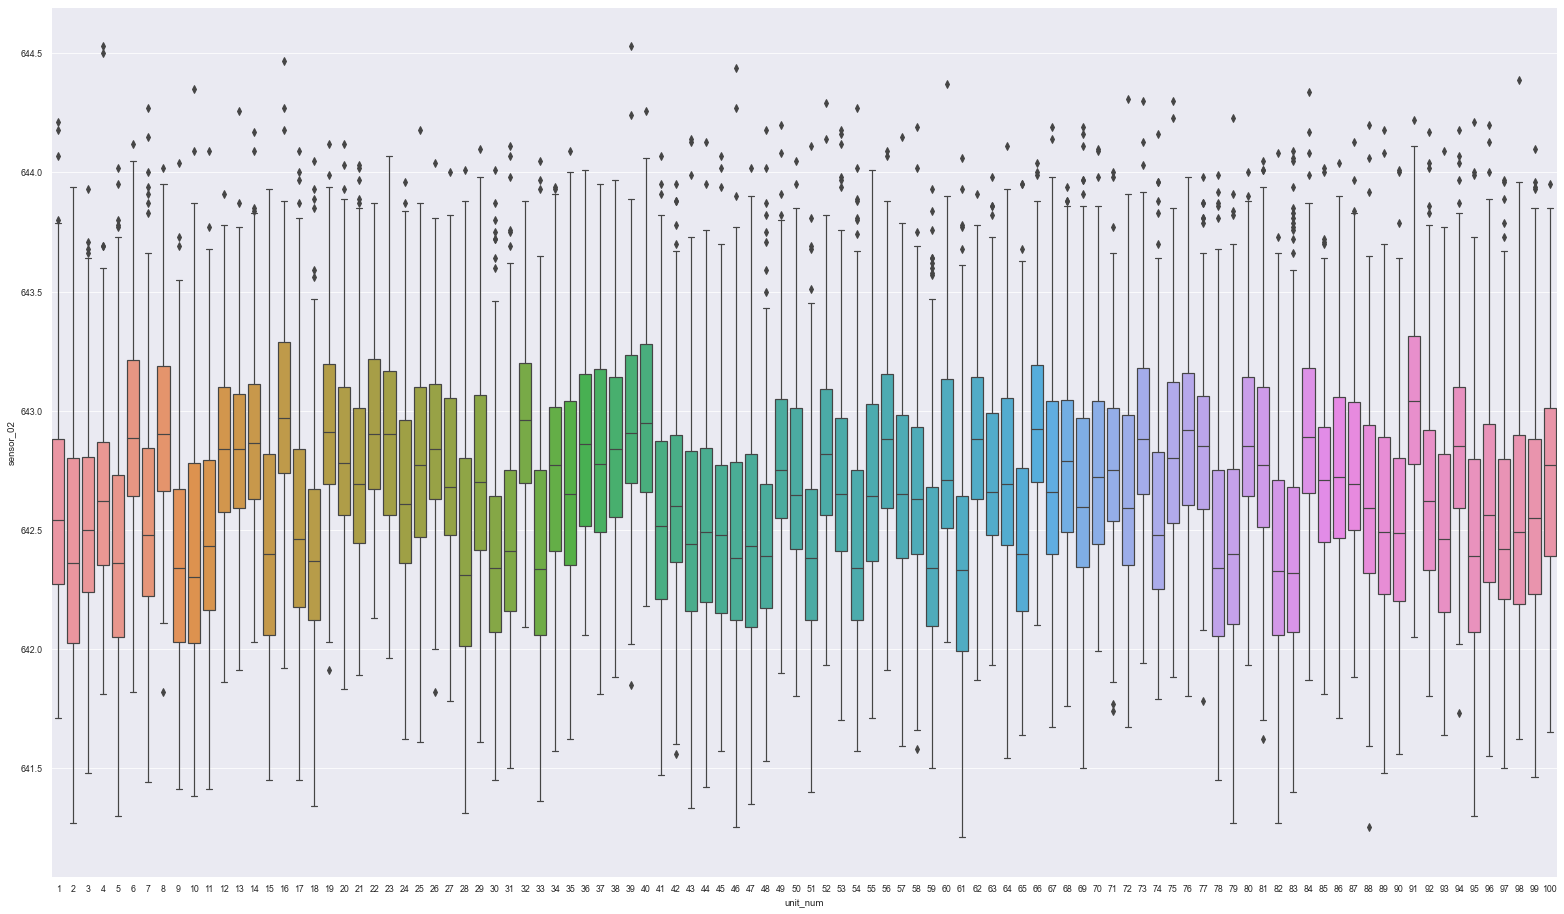

In [371]:
plt.figure(figsize=(27,16))
sns.boxplot(x="unit_num", y="sensor_02",data=df)
plt.show()

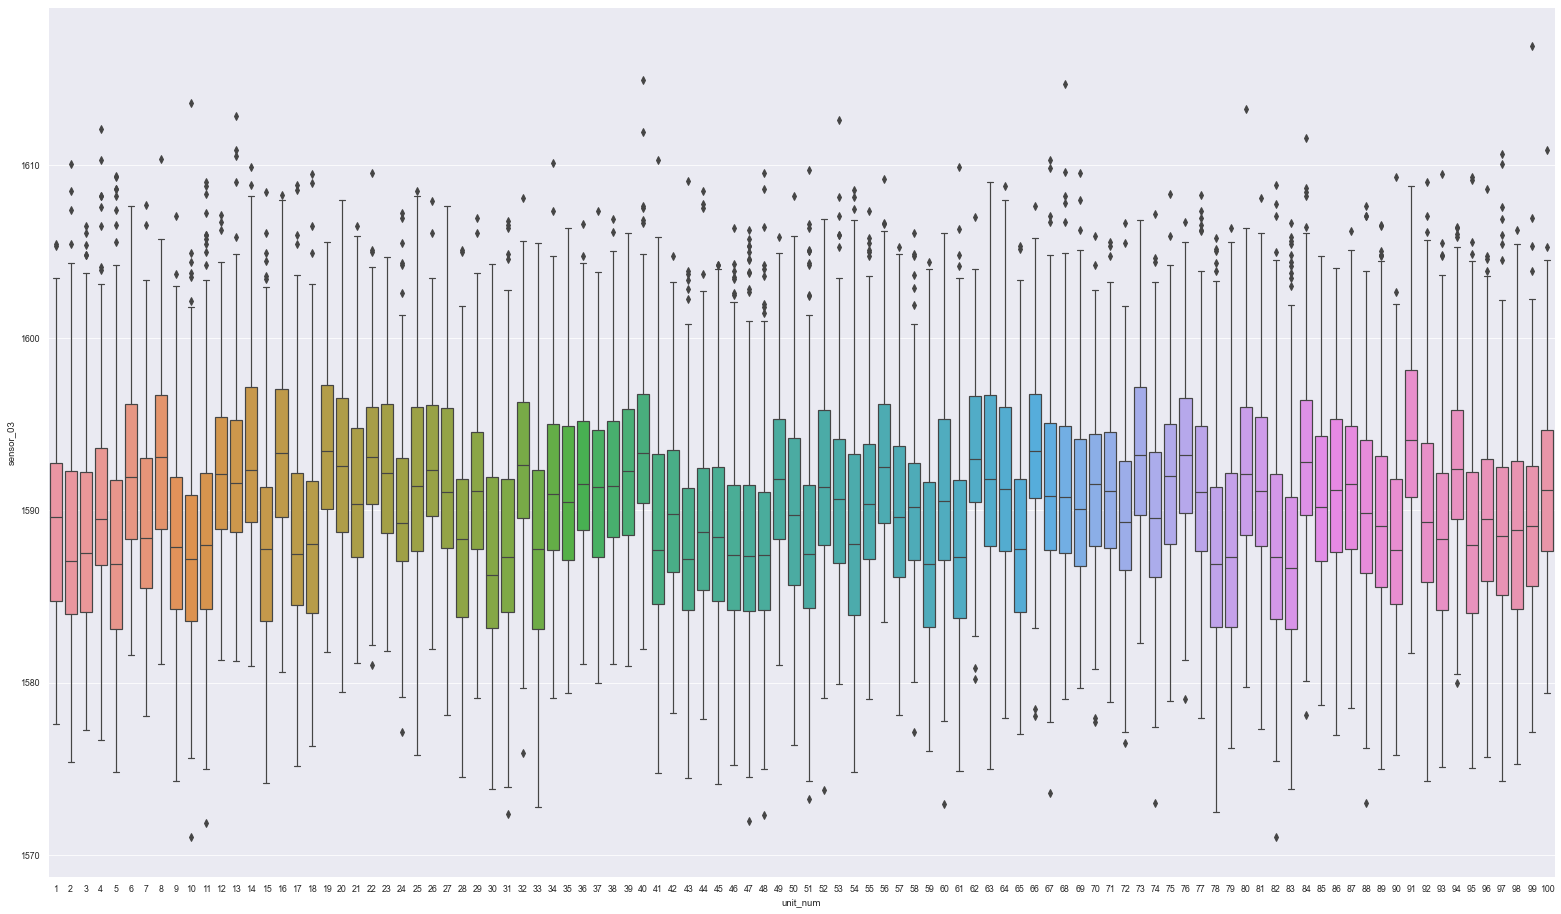

In [372]:
plt.figure(figsize=(27,16))
sns.boxplot(x="unit_num", y="sensor_03",data=df)
plt.show()

In [373]:
#plt.figure(figsize=(27,16))
sns.lineplot(x=df["RUL"] ,y=df["sensor_02"],hue=df["unit_num"], linewidth=1.5, ax=ax1)
plt.show()

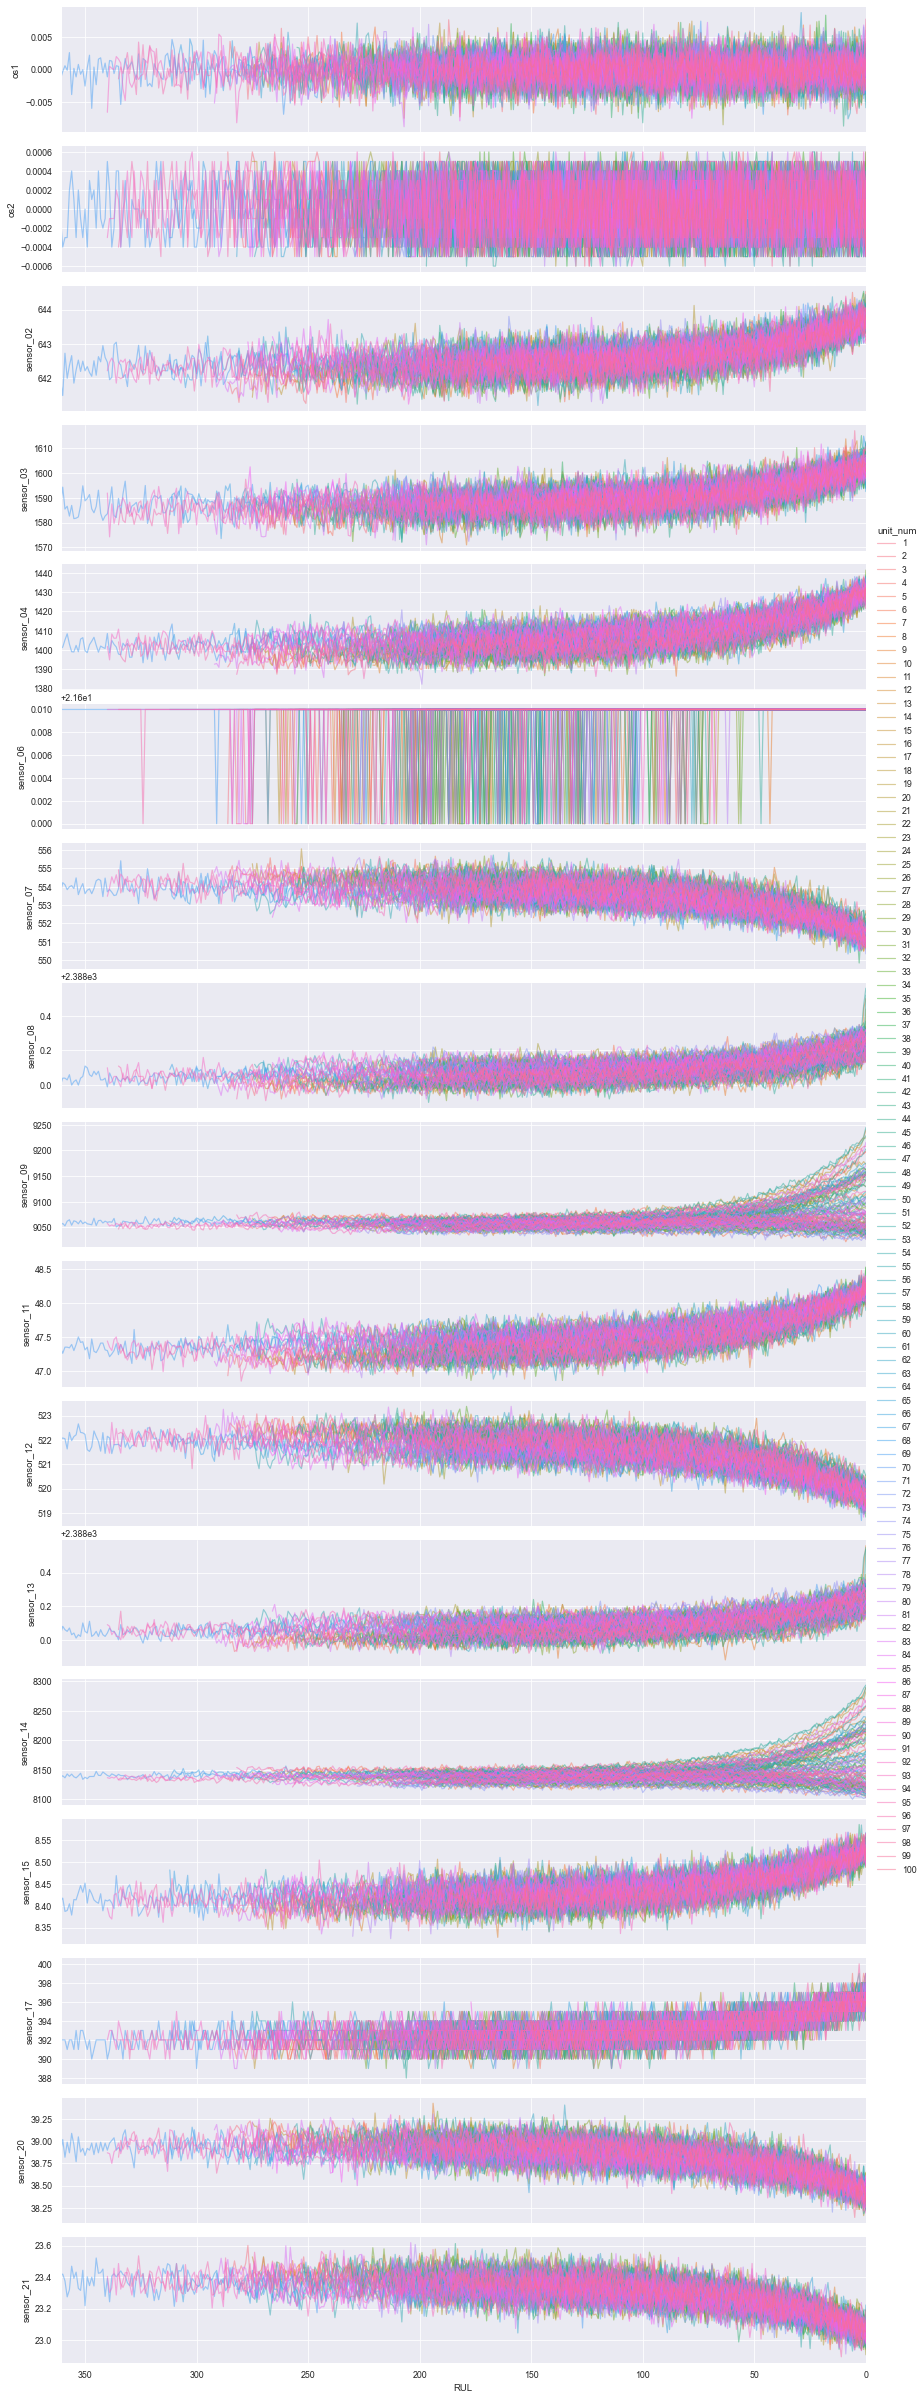

In [374]:
g = sns.PairGrid(data=df, x_vars="RUL", y_vars=df.drop(["unit_num","cycle_time","RUL"],axis=1).columns,
                 hue="unit_num", height=2, aspect=6)
g = g.map(plt.plot, alpha=0.5)
g = g.set(xlim=(df['RUL'].max(),df['RUL'].min()))
g = g.add_legend()

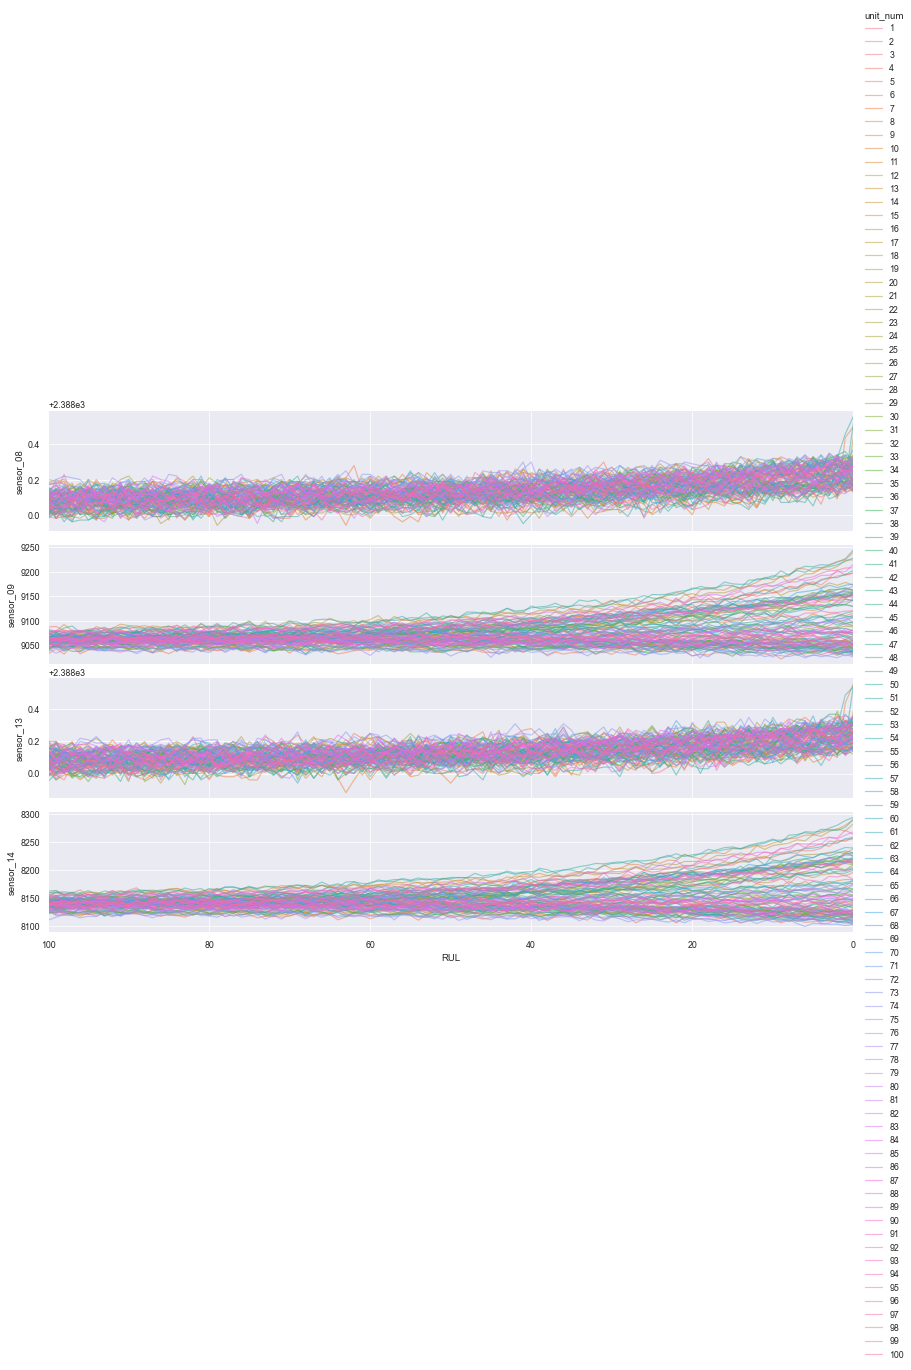

In [375]:
df_var = df[df["RUL"]<=100][["unit_num", "sensor_08", "sensor_09", "sensor_13", "sensor_14","RUL"]]
df_var
df_var_col = ["sensor_08", "sensor_09", "sensor_13", "sensor_14"]
g = sns.PairGrid(data=df_var, x_vars="RUL", y_vars=df_var_col, hue="unit_num", height=2, aspect=6,)
g = g.map(plt.plot, alpha=0.5)
g = g.set(xlim=(df_var['RUL'].max(),df_var['RUL'].min()))
g = g.add_legend()

# Train Regression Models

In [376]:
df

unit_num  cycle_time     os1     os2  sensor_02  sensor_03  sensor_04  \
0             1           1 -0.0007 -0.0004     641.82    1589.70    1400.60   
1             1           2  0.0019 -0.0003     642.15    1591.82    1403.14   
2             1           3 -0.0043  0.0003     642.35    1587.99    1404.20   
3             1           4  0.0007  0.0000     642.35    1582.79    1401.87   
4             1           5 -0.0019 -0.0002     642.37    1582.85    1406.22   
...         ...         ...     ...     ...        ...        ...        ...   
20626       100         196 -0.0004 -0.0003     643.49    1597.98    1428.63   
20627       100         197 -0.0016 -0.0005     643.54    1604.50    1433.58   
20628       100         198  0.0004  0.0000     643.42    1602.46    1428.18   
20629       100         199 -0.0011  0.0003     643.23    1605.26    1426.53   
20630       100         200 -0.0032 -0.0005     643.85    1600.38    1432.14   

       sensor_06  sensor_07  sensor_08  sensor_09  sensor_11  sensor_12  \
0          21.61     554.36    2388.06    9046.19      47.47     521.66   
1          21.61     553.75    2388.04    9044.07      47.49     522.28   
2          21.61     554.26    2388.08    9052.94      47.27     522.42   
3          21.61     554.45    2388.11    9049.48      47.13     522.86   
4          21.61     554.00    2388.06    9055.15      47.28     522.19   
...          ...        ...        ...        ...        ...        ...   
20626      21.61     551.43    2388.19    9065.52      48.07     519.49   
20627      21.61     550.86    2388.23    9065.11      48.04     519.68   
20628      21.61     550.94    2388.24    9065.90      48.09     520.01   
20629      21.61     550.68    2388.25    9073.72      48.39     519.67   
20630      21.61     550.79    2388.26    9061.48      48.20     519.30   

       sensor_13  sensor_14  sensor_15  sensor_17  sensor_20  sensor_21  RUL  
0        2388.02    8138.62     8.4195        392      39.06    23.4190  191  
1        2388.07    8131.49     8.4318        392      39.00    23.4236  190  
2        2388.03    8133.23     8.4178        390      38.95    23.3442  189  
3        2388.08    8133.83     8.3682        392      38.88    23.3739  188  
4        2388.04    8133.80     8.4294        393      38.90    23.4044  187  
...          ...        ...        ...        ...        ...        ...  ...  
20626    2388.26    8137.60     8.4956        397      38.49    22.9735    4  
20627    2388.22    8136.50     8.5139        395      38.30    23.1594    3  
20628    2388.24    8141.05     8.5646        398      38.44    22.9333    2  
20629    2388.23    8139.29     8.5389        395      38.29    23.0640    1  
20630    2388.26    8137.33     8.5036        396      38.37    23.0522    0  

[20631 rows x 20 columns]

# KNeighborsRegressor

In [377]:
    X = df.drop(["os1","os2","sensor_07","sensor_12","sensor_09","RUL"],axis=1)
    ss = StandardScaler()
    print(X)
    X = ss.fit_transform(X)
    y = df["RUL"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    

    
    model_matrices = {}
    

       unit_num  cycle_time  sensor_02  sensor_03  sensor_04  sensor_06  \
0             1           1     641.82    1589.70    1400.60      21.61   
1             1           2     642.15    1591.82    1403.14      21.61   
2             1           3     642.35    1587.99    1404.20      21.61   
3             1           4     642.35    1582.79    1401.87      21.61   
4             1           5     642.37    1582.85    1406.22      21.61   
...         ...         ...        ...        ...        ...        ...   
20626       100         196     643.49    1597.98    1428.63      21.61   
20627       100         197     643.54    1604.50    1433.58      21.61   
20628       100         198     643.42    1602.46    1428.18      21.61   
20629       100         199     643.23    1605.26    1426.53      21.61   
20630       100         200     643.85    1600.38    1432.14      21.61   

       sensor_08  sensor_11  sensor_13  sensor_14  sensor_15  sensor_17  \
0        2388.06      47

In [378]:
knn = KNeighborsRegressor(n_neighbors=9, weights="distance", p=1, )
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn.shape

(6190,)

In [379]:
MAE = mean_absolute_error(y_test,y_pred_knn)
MSE = mean_squared_error(y_test,y_pred_knn)
RMSE = (mean_squared_error(y_test,y_pred_knn))**(0.5)
R2_score = r2_score(y_test,y_pred_knn)

knn_model_matrix = {
    'MAE' : MAE,
    'MSE' :MSE,
    'RMSE':RMSE,
    'R2_score':R2_score
}
knn_model_matrix

{'MAE': 24.175829599688267,
 'MSE': 1174.3047209231459,
 'RMSE': 34.2681298136205,
 'R2_score': 0.7436225680747156}

# SVM

In [380]:
svm  = SVR(C=5, )
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)



svm_model_matrix ={
    'MAE' : mean_absolute_error(y_test,y_pred_svm),
    'MSE' :mean_squared_error(y_test,y_pred_svm),
    'RMSE':(mean_squared_error(y_test,y_pred_svm))**(0.5),
    'R2_score':r2_score(y_test,y_pred_svm)
}
svm_model_matrix

{'MAE': 23.721423666145547,
 'MSE': 1228.0919696908393,
 'RMSE': 35.044143158177505,
 'R2_score': 0.7318795881959094}

# Lasso

In [381]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


lasso_model_matrix ={
    'MAE' : mean_absolute_error(y_test,y_pred_lasso),
    'MSE' :mean_squared_error(y_test,y_pred_lasso),
    'RMSE':(mean_squared_error(y_test,y_pred_lasso))**(0.5),
    'R2_score':r2_score(y_test,y_pred_lasso)
}
lasso_model_matrix

{'MAE': 30.240944174655006,
 'MSE': 1520.8158187963147,
 'RMSE': 38.99763863102886,
 'R2_score': 0.6679713134868122}

# RandomForest


In [382]:
rf = RandomForestRegressor(n_estimators=75)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)




rf_model_matrix ={
    'MAE' : mean_absolute_error(y_test,y_pred_rf),
    'MSE' :mean_squared_error(y_test,y_pred_rf),
    'RMSE':(mean_squared_error(y_test,y_pred_rf))**(0.5),
    'R2_score':r2_score(y_test,y_pred_rf)
}
rf_model_matrix

{'MAE': 11.219696284329563,
 'MSE': 287.41300942739184,
 'RMSE': 16.953259551702494,
 'R2_score': 0.9372512023957581}

# models matrices

In [383]:
df_knn_metrics = pd.DataFrame.from_dict(knn_model_matrix, orient='index')
df_knn_metrics.columns = ['knn']
model_matrics = df_knn_metrics

In [384]:
df_svm_metrics = pd.DataFrame.from_dict(svm_model_matrix, orient='index')
df_svm_metrics.columns = ['svm']


In [385]:
df_lasso_metrics = pd.DataFrame.from_dict(lasso_model_matrix, orient='index')
df_lasso_metrics.columns = ['lasso']


In [386]:
df_rf_metrics = pd.DataFrame.from_dict(rf_model_matrix, orient='index')
df_rf_metrics.columns = ['rf']


In [387]:
model_metrics = pd.concat([model_matrics, df_svm_metrics,df_lasso_metrics,df_rf_metrics],axis=1)

In [388]:
model_metrics

knn          svm        lasso          rf
MAE         24.175830    23.721424    30.240944   11.219696
MSE       1174.304721  1228.091970  1520.815819  287.413009
RMSE        34.268130    35.044143    38.997639   16.953260
R2_score     0.743623     0.731880     0.667971    0.937251

# Classification Models 

In [389]:
df_clf = df.copy()
df_clf.head()
df_clf

unit_num  cycle_time     os1     os2  sensor_02  sensor_03  sensor_04  \
0             1           1 -0.0007 -0.0004     641.82    1589.70    1400.60   
1             1           2  0.0019 -0.0003     642.15    1591.82    1403.14   
2             1           3 -0.0043  0.0003     642.35    1587.99    1404.20   
3             1           4  0.0007  0.0000     642.35    1582.79    1401.87   
4             1           5 -0.0019 -0.0002     642.37    1582.85    1406.22   
...         ...         ...     ...     ...        ...        ...        ...   
20626       100         196 -0.0004 -0.0003     643.49    1597.98    1428.63   
20627       100         197 -0.0016 -0.0005     643.54    1604.50    1433.58   
20628       100         198  0.0004  0.0000     643.42    1602.46    1428.18   
20629       100         199 -0.0011  0.0003     643.23    1605.26    1426.53   
20630       100         200 -0.0032 -0.0005     643.85    1600.38    1432.14   

       sensor_06  sensor_07  sensor_08  sensor_09  sensor_11  sensor_12  \
0          21.61     554.36    2388.06    9046.19      47.47     521.66   
1          21.61     553.75    2388.04    9044.07      47.49     522.28   
2          21.61     554.26    2388.08    9052.94      47.27     522.42   
3          21.61     554.45    2388.11    9049.48      47.13     522.86   
4          21.61     554.00    2388.06    9055.15      47.28     522.19   
...          ...        ...        ...        ...        ...        ...   
20626      21.61     551.43    2388.19    9065.52      48.07     519.49   
20627      21.61     550.86    2388.23    9065.11      48.04     519.68   
20628      21.61     550.94    2388.24    9065.90      48.09     520.01   
20629      21.61     550.68    2388.25    9073.72      48.39     519.67   
20630      21.61     550.79    2388.26    9061.48      48.20     519.30   

       sensor_13  sensor_14  sensor_15  sensor_17  sensor_20  sensor_21  RUL  
0        2388.02    8138.62     8.4195        392      39.06    23.4190  191  
1        2388.07    8131.49     8.4318        392      39.00    23.4236  190  
2        2388.03    8133.23     8.4178        390      38.95    23.3442  189  
3        2388.08    8133.83     8.3682        392      38.88    23.3739  188  
4        2388.04    8133.80     8.4294        393      38.90    23.4044  187  
...          ...        ...        ...        ...        ...        ...  ...  
20626    2388.26    8137.60     8.4956        397      38.49    22.9735    4  
20627    2388.22    8136.50     8.5139        395      38.30    23.1594    3  
20628    2388.24    8141.05     8.5646        398      38.44    22.9333    2  
20629    2388.23    8139.29     8.5389        395      38.29    23.0640    1  
20630    2388.26    8137.33     8.5036        396      38.37    23.0522    0  

[20631 rows x 20 columns]

In [390]:
df_clf["RUL_clf"] = [1 if i <= 30 else 0 for i in df_clf["RUL"] ]
df_clf["RUL_clf"]

0        0
1        0
2        0
3        0
4        0
        ..
20626    1
20627    1
20628    1
20629    1
20630    1
Name: RUL_clf, Length: 20631, dtype: int64

In [391]:
df_clf.drop("RUL",axis=1, inplace=True)
df_clf.head()

unit_num  cycle_time     os1     os2  sensor_02  sensor_03  sensor_04  \
0         1           1 -0.0007 -0.0004     641.82    1589.70    1400.60   
1         1           2  0.0019 -0.0003     642.15    1591.82    1403.14   
2         1           3 -0.0043  0.0003     642.35    1587.99    1404.20   
3         1           4  0.0007  0.0000     642.35    1582.79    1401.87   
4         1           5 -0.0019 -0.0002     642.37    1582.85    1406.22   

   sensor_06  sensor_07  sensor_08  sensor_09  sensor_11  sensor_12  \
0      21.61     554.36    2388.06    9046.19      47.47     521.66   
1      21.61     553.75    2388.04    9044.07      47.49     522.28   
2      21.61     554.26    2388.08    9052.94      47.27     522.42   
3      21.61     554.45    2388.11    9049.48      47.13     522.86   
4      21.61     554.00    2388.06    9055.15      47.28     522.19   

   sensor_13  sensor_14  sensor_15  sensor_17  sensor_20  sensor_21  RUL_clf  
0    2388.02    8138.62     8.4195        392      39.06    23.4190        0  
1    2388.07    8131.49     8.4318        392      39.00    23.4236        0  
2    2388.03    8133.23     8.4178        390      38.95    23.3442        0  
3    2388.08    8133.83     8.3682        392      38.88    23.3739        0  
4    2388.04    8133.80     8.4294        393      38.90    23.4044        0

In [392]:
X = df_clf.drop(["os1","os2","sensor_07","sensor_12","sensor_09","RUL_clf"],axis=1)
ss = StandardScaler()
X = ss.fit_transform(X)
y = df_clf["RUL_clf"]
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)
model_scores = {}

# LogisticRegression

{'Accuracy Score': 0.9599353796445881, 'Precision Score': 0.8755506607929515, 'Recall Score': 0.8548387096774194, 'F1 Score': 0.8650707290533188, 'Auc Score': 0.9166779099717897}


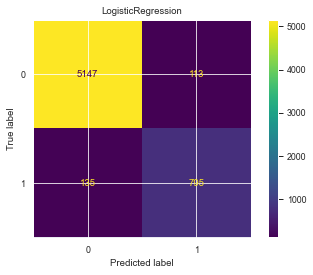

In [393]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
clf_metrics_lr = {
                        "Accuracy Score": accuracy_score(y_test, y_pred_lr),
                        "Precision Score": precision_score(y_test, y_pred_lr),
                        "Recall Score": recall_score(y_test, y_pred_lr),
                        "F1 Score" : f1_score(y_test, y_pred_lr),
                        "Auc Score": roc_auc_score(y_test, y_pred_lr)
                  }
print(clf_metrics_lr)

plot_confusion_matrix(lr, X_test, y_test)
plt.title("LogisticRegression")
plt.show()

# Random Forest

{'Accuracy Score': 0.9621970920840065, 'Precision Score': 0.881578947368421, 'Recall Score': 0.864516129032258, 'F1 Score': 0.8729641693811075, 'Auc Score': 0.9219919048203115}


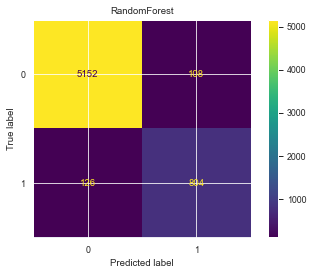

In [394]:
rf_clf = RandomForestClassifier(n_estimators=75, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)


clf_metrics_rf_clf = {
                        "Accuracy Score": accuracy_score(y_test, y_pred_rf_clf),
                        "Precision Score": precision_score(y_test, y_pred_rf_clf),
                        "Recall Score": recall_score(y_test, y_pred_rf_clf),
                        "F1 Score" : f1_score(y_test, y_pred_rf_clf),
                        "Auc Score": roc_auc_score(y_test, y_pred_rf_clf)
                  }
print(clf_metrics_rf_clf)
plot_confusion_matrix(rf_clf, X_test, y_test)
plt.title("RandomForest")
plt.show()


# Nearest Neighbor

{'Accuracy Score': 0.9630048465266559, 'Precision Score': 0.9005714285714286, 'Recall Score': 0.8473118279569892, 'F1 Score': 0.8731301939058171, 'Auc Score': 0.9153859520013082}


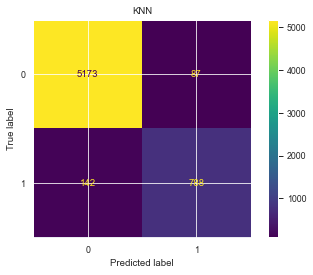

In [395]:
knn_clf = KNeighborsClassifier(n_neighbors=9, p=1)
knn_clf.fit(X_train, y_train)
y_pred_knn_clf = knn_clf.predict(X_test)

clf_metrics_knn_clf = {
                        "Accuracy Score": accuracy_score(y_test, y_pred_knn_clf),
                        "Precision Score": precision_score(y_test, y_pred_knn_clf),
                        "Recall Score": recall_score(y_test, y_pred_knn_clf),
                        "F1 Score" : f1_score(y_test, y_pred_knn_clf),
                        "Auc Score": roc_auc_score(y_test, y_pred_knn_clf)
                  }
print(clf_metrics_knn_clf)
plot_confusion_matrix(knn_clf, X_test, y_test)
plt.title("KNN")
plt.show()






# Radial basis function(RBF) SVM

{'Accuracy Score': 0.9649434571890145, 'Precision Score': 0.9046538024971623, 'Recall Score': 0.8569892473118279, 'F1 Score': 0.88017669795693, 'Auc Score': 0.9205098327813892}


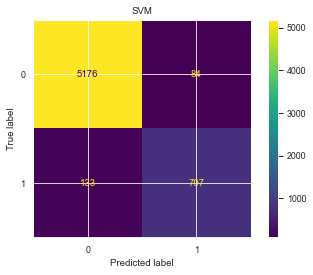

In [396]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm_clf = svm_clf.predict(X_test)

clf_metrics_svm_clf = {
                        "Accuracy Score": accuracy_score(y_test, y_pred_svm_clf),
                        "Precision Score": precision_score(y_test, y_pred_svm_clf),
                        "Recall Score": recall_score(y_test, y_pred_svm_clf),
                        "F1 Score" : f1_score(y_test, y_pred_svm_clf),
                        "Auc Score": roc_auc_score(y_test, y_pred_svm_clf)
                  }
print(clf_metrics_svm_clf)
plot_confusion_matrix(svm_clf, X_test, y_test)
plt.title("SVM")
plt.show()

In [397]:
model_score_new = {}
df_knn_metrics_new = pd.DataFrame.from_dict(clf_metrics_knn_clf_new, orient='index')
df_knn_metrics_new.columns = ['knn']
model_score_new = df_knn_metrics_new


df_rf_metrics_new = pd.DataFrame.from_dict(clf_metrics_rf_clf_new, orient='index')
df_rf_metrics_new.columns = ['rf']


df_lr_metrics_new = pd.DataFrame.from_dict(clf_metrics_lr_new, orient='index')
df_lr_metrics_new.columns = ['lr']


df_svm_metrics_new = pd.DataFrame.from_dict(clf_metrics_svm_clf_new, orient='index')
df_svm_metrics_new.columns = ['svm']

model_score_new = pd.concat([model_score_new, df_lr_metrics_new,df_svm_metrics_new,df_rf_metrics_new],axis=1)
model_score_new


knn        lr       svm        rf
Accuracy Score   0.802764  0.793601  0.803070  0.802917
Precision Score  0.726953  0.666109  0.739210  0.712531
Recall Score     0.267097  0.256774  0.259677  0.280645
F1 Score         0.390658  0.370664  0.384340  0.402685
Auc Score        0.617992  0.608429  0.615633  0.622766

# testing unseen data 

In [398]:
dirname = os.getcwd()
path = os.path.join(dirname, "CMAPSSData")
dc = load_data(path=path)
df_test = dc['FD_001']['df_test'].copy()
df_test_base = df.copy()
df_test.head()


unit_num  cycle_time     os1     os2    os3  sensor_01  sensor_02  \
0         1           1  0.0023  0.0003  100.0     518.67     643.02   
1         1           2 -0.0027 -0.0003  100.0     518.67     641.71   
2         1           3  0.0003  0.0001  100.0     518.67     642.46   
3         1           4  0.0042  0.0000  100.0     518.67     642.44   
4         1           5  0.0014  0.0000  100.0     518.67     642.51   

   sensor_03  sensor_04  sensor_05  ...  sensor_17  sensor_18  sensor_19  \
0    1585.29    1398.21      14.62  ...        392       2388      100.0   
1    1588.45    1395.42      14.62  ...        393       2388      100.0   
2    1586.94    1401.34      14.62  ...        393       2388      100.0   
3    1584.12    1406.42      14.62  ...        391       2388      100.0   
4    1587.19    1401.92      14.62  ...        390       2388      100.0   

   sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  sensor_25  sensor_26  
0      38.86    23.3735        NaN        NaN        NaN        NaN        NaN  
1      39.02    23.3916        NaN        NaN        NaN        NaN        NaN  
2      39.08    23.4166        NaN        NaN        NaN        NaN        NaN  
3      39.00    23.3737        NaN        NaN        NaN        NaN        NaN  
4      38.99    23.4130        NaN        NaN        NaN        NaN        NaN  

[5 rows x 31 columns]

In [399]:
na_list = df_test.columns[df_test.isna().any()].tolist()
const_list = [col for col in df_test.columns if len(df_test[col].unique()) <= 1] 


df_test.drop(columns=na_list+const_list,axis=1, inplace=True)
df_test

unit_num  cycle_time     os1     os2  sensor_02  sensor_03  sensor_04  \
0             1           1  0.0023  0.0003     643.02    1585.29    1398.21   
1             1           2 -0.0027 -0.0003     641.71    1588.45    1395.42   
2             1           3  0.0003  0.0001     642.46    1586.94    1401.34   
3             1           4  0.0042  0.0000     642.44    1584.12    1406.42   
4             1           5  0.0014  0.0000     642.51    1587.19    1401.92   
...         ...         ...     ...     ...        ...        ...        ...   
13091       100         194  0.0049  0.0000     643.24    1599.45    1415.79   
13092       100         195 -0.0011 -0.0001     643.22    1595.69    1422.05   
13093       100         196 -0.0006 -0.0003     643.44    1593.15    1406.82   
13094       100         197 -0.0038  0.0001     643.26    1594.99    1419.36   
13095       100         198  0.0013  0.0003     642.95    1601.62    1424.99   

       sensor_06  sensor_07  sensor_08  sensor_09  sensor_11  sensor_12  \
0          21.61     553.90    2388.04    9050.17      47.20     521.72   
1          21.61     554.85    2388.01    9054.42      47.50     522.16   
2          21.61     554.11    2388.05    9056.96      47.50     521.97   
3          21.61     554.07    2388.03    9045.29      47.28     521.38   
4          21.61     554.16    2388.01    9044.55      47.31     522.15   
...          ...        ...        ...        ...        ...        ...   
13091      21.61     553.41    2388.02    9142.37      47.69     520.69   
13092      21.61     553.22    2388.05    9140.68      47.60     521.05   
13093      21.61     553.04    2388.11    9146.81      47.57     521.18   
13094      21.61     553.37    2388.07    9148.85      47.61     521.33   
13095      21.61     552.48    2388.06    9155.03      47.80     521.07   

       sensor_13  sensor_14  sensor_15  sensor_17  sensor_20  sensor_21  
0        2388.03    8125.55     8.4052        392      38.86    23.3735  
1        2388.06    8139.62     8.3803        393      39.02    23.3916  
2        2388.03    8130.10     8.4441        393      39.08    23.4166  
3        2388.05    8132.90     8.3917        391      39.00    23.3737  
4        2388.03    8129.54     8.4031        390      38.99    23.4130  
...          ...        ...        ...        ...        ...        ...  
13091    2388.00    8213.28     8.4715        394      38.65    23.1974  
13092    2388.09    8210.85     8.4512        395      38.57    23.2771  
13093    2388.04    8217.24     8.4569        395      38.62    23.2051  
13094    2388.08    8220.48     8.4711        395      38.66    23.2699  
13095    2388.05    8214.64     8.4903        396      38.70    23.1855  

[13096 rows x 19 columns]

In [400]:
df_test.describe()

unit_num    cycle_time           os1           os2     sensor_02  \
count  13096.000000  13096.000000  13096.000000  13096.000000  13096.000000   
mean      51.543907     76.836515     -0.000011      0.000004    642.475088   
std       28.289423     53.057749      0.002203      0.000294      0.400899   
min        1.000000      1.000000     -0.008200     -0.000600    641.130000   
25%       28.000000     33.000000     -0.001500     -0.000200    642.197500   
50%       52.000000     69.000000      0.000000      0.000000    642.460000   
75%       76.000000    113.000000      0.001500      0.000300    642.740000   
max      100.000000    303.000000      0.007800      0.000700    644.300000   

          sensor_03     sensor_04     sensor_06     sensor_07     sensor_08  \
count  13096.000000  13096.000000  13096.000000  13096.000000  13096.000000   
mean    1588.099204   1404.735362     21.609701    553.757523   2388.070964   
std        5.003274      6.688309      0.001704      0.681286      0.057442   
min     1569.040000   1384.390000     21.600000    550.880000   2387.890000   
25%     1584.600000   1399.950000     21.610000    553.310000   2388.030000   
50%     1587.990000   1404.440000     21.610000    553.800000   2388.070000   
75%     1591.362500   1409.050000     21.610000    554.240000   2388.110000   
max     1607.550000   1433.360000     21.610000    555.840000   2388.300000   

          sensor_09     sensor_11     sensor_12     sensor_13     sensor_14  \
count  13096.000000  13096.000000  13096.000000  13096.000000  13096.000000   
mean    9058.407363     47.416204    521.747724   2388.071025   8138.947817   
std       11.436261      0.195917      0.559627      0.056934     10.188605   
min     9024.530000     46.800000    519.380000   2387.890000   8108.500000   
25%     9051.020000     47.270000    521.380000   2388.030000   8132.310000   
50%     9057.320000     47.410000    521.780000   2388.070000   8138.390000   
75%     9064.110000     47.540000    522.150000   2388.110000   8144.360000   
max     9155.030000     48.260000    523.760000   2388.320000   8220.480000   

          sensor_15     sensor_17     sensor_20     sensor_21  
count  13096.000000  13096.000000  13096.000000  13096.000000  
mean       8.425844    392.571625     38.892502     23.335743  
std        0.029009      1.233577      0.141681      0.084120  
min        8.332800    389.000000     38.310000     22.935400  
25%        8.405600    392.000000     38.800000     23.281600  
50%        8.424900    393.000000     38.900000     23.339200  
75%        8.444300    393.000000     38.990000     23.393600  
max        8.541400    397.000000     39.410000     23.641900

# RUL calculation

In [401]:
units = df_test["unit_num"].unique().tolist()
dicti = {}
for i in units:
    dicti[i] = df_test[df_test["unit_num"] == i]["cycle_time"].max()    
df_test["RUL"] = df_test["unit_num"].apply(lambda key: dicti[key]) - df_test["cycle_time"]

In [402]:
X = df_test.drop(["os1","os2","sensor_07","sensor_12","sensor_09","RUL"],axis=1)
ss = StandardScaler()
x = ss.fit_transform(X)
y_actual = df_test["RUL"]

In [403]:
model_matrices_new = {}

In [404]:
y_new_pred_knn = knn.predict(x)

MAE = mean_absolute_error(y_actual,y_new_pred_knn)
MSE = mean_squared_error(y_actual,y_new_pred_knn)
RMSE = (mean_squared_error(y_actual,y_new_pred_knn))**(0.5)
R2_score = r2_score(y_actual,y_new_pred_knn)

knn_model_matrix_new = {
    'MAE' : MAE,
    'MSE' :MSE,
    'RMSE':RMSE,
    'R2_score':R2_score
}
knn_model_matrix_new


{'MAE': 44.53636744678304,
 'MSE': 3411.6696443706137,
 'RMSE': 58.40949960726092,
 'R2_score': -0.21199962512764414}

In [405]:
y_new_pred_svm = svm.predict(x)



svm_model_matrix_new ={
    'MAE' : mean_absolute_error(y_actual,y_new_pred_svm),
    'MSE' :mean_squared_error(y_actual,y_new_pred_svm),
    'RMSE':(mean_squared_error(y_actual,y_new_pred_svm))**(0.5),
    'R2_score':r2_score(y_actual,y_new_pred_svm)
}
svm_model_matrix_new

{'MAE': 39.120882920313626,
 'MSE': 2624.295740053228,
 'RMSE': 51.22788049542191,
 'R2_score': 0.06771587383415811}

In [406]:
y_new_pred_lasso = lasso.predict(x)
#print(y_actual.shape)
#print(y_new_pred_lasso.shape)
lasso_model_matrix_new ={
    'MAE' : mean_absolute_error(y_actual,y_new_pred_lasso),
    'MSE' :mean_squared_error(y_actual,y_new_pred_lasso),
    'RMSE':(mean_squared_error(y_actual,y_new_pred_lasso))**(0.5),
    'R2_score':r2_score(y_actual,y_new_pred_lasso)
}
lasso_model_matrix_new

{'MAE': 45.39722807874287,
 'MSE': 3350.58690906215,
 'RMSE': 57.88425441397816,
 'R2_score': -0.1902999120801674}

In [407]:
y_new_pred_rf = rf.predict(x)




rf_model_matrix_new ={
    'MAE' : mean_absolute_error(y_actual,y_new_pred_rf),
    'MSE' :mean_squared_error(y_actual,y_new_pred_rf),
    'RMSE':(mean_squared_error(y_actual,y_new_pred_rf))**(0.5),
    'R2_score':r2_score(y_actual,y_new_pred_rf)
}
rf_model_matrix_new

{'MAE': 44.72605884748524,
 'MSE': 3539.2540164935854,
 'RMSE': 59.491629801961096,
 'R2_score': -0.2573241223105225}

In [408]:
df_knn_metrics_new = pd.DataFrame.from_dict(knn_model_matrix_new, orient='index')
df_knn_metrics_new.columns = ['knn']
model_matrics_new = df_knn_metrics_new


df_svm_metrics_new = pd.DataFrame.from_dict(svm_model_matrix_new, orient='index')
df_svm_metrics_new.columns = ['svm']


df_lasso_metrics_new = pd.DataFrame.from_dict(lasso_model_matrix_new, orient='index')
df_lasso_metrics_new.columns = ['lasso']

df_rf_metrics_new = pd.DataFrame.from_dict(rf_model_matrix_new, orient='index')
df_rf_metrics_new.columns = ['rf']


model_metrics_new = pd.concat([model_matrics_new, df_rf_metrics_new,df_lasso_metrics_new,df_svm_metrics_new],axis=1)


model_metrics_new

knn           rf        lasso          svm
MAE         44.536367    44.726059    45.397228    39.120883
MSE       3411.669644  3539.254016  3350.586909  2624.295740
RMSE        58.409500    59.491630    57.884254    51.227880
R2_score    -0.212000    -0.257324    -0.190300     0.067716

# classification 

In [409]:
df_test_clf = df_test.copy()
df_test_clf["RUL_clf"] = [1 if i <= 30 else 0 for i in df_test_clf["RUL"] ]
df_test_clf["RUL_clf"]

0        1
1        1
2        1
3        1
4        1
        ..
13091    1
13092    1
13093    1
13094    1
13095    1
Name: RUL_clf, Length: 13096, dtype: int64

In [410]:
print(df_test_clf["RUL_clf"].value_counts())

0    9996
1    3100
Name: RUL_clf, dtype: int64


In [411]:
X = df_test_clf.drop(["os1","os2","sensor_07","sensor_12","sensor_09","RUL_clf","RUL"],axis=1)
print(X)
ss = StandardScaler()
X = ss.fit_transform(X)
y = df_test_clf["RUL_clf"]



       unit_num  cycle_time  sensor_02  sensor_03  sensor_04  sensor_06  \
0             1           1     643.02    1585.29    1398.21      21.61   
1             1           2     641.71    1588.45    1395.42      21.61   
2             1           3     642.46    1586.94    1401.34      21.61   
3             1           4     642.44    1584.12    1406.42      21.61   
4             1           5     642.51    1587.19    1401.92      21.61   
...         ...         ...        ...        ...        ...        ...   
13091       100         194     643.24    1599.45    1415.79      21.61   
13092       100         195     643.22    1595.69    1422.05      21.61   
13093       100         196     643.44    1593.15    1406.82      21.61   
13094       100         197     643.26    1594.99    1419.36      21.61   
13095       100         198     642.95    1601.62    1424.99      21.61   

       sensor_08  sensor_11  sensor_13  sensor_14  sensor_15  sensor_17  \
0        2388.04      47

# LR

{'Accuracy Score': 0.7936010995723886, 'Precision Score': 0.6661087866108787, 'Recall Score': 0.2567741935483871, 'F1 Score': 0.370663562281723, 'Auc Score': 0.6084291135809162}


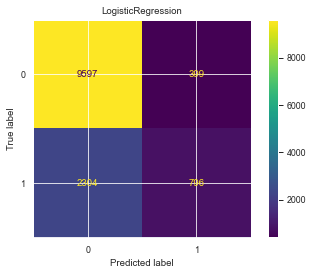

In [412]:
y_new_pred_lr = lr.predict(X)
clf_metrics_lr_new = {
                        "Accuracy Score": accuracy_score(y, y_new_pred_lr),
                        "Precision Score": precision_score(y, y_new_pred_lr),
                        "Recall Score": recall_score(y, y_new_pred_lr),
                        "F1 Score" : f1_score(y, y_new_pred_lr),
                        "Auc Score": roc_auc_score(y, y_new_pred_lr)
                  }
print(clf_metrics_lr_new)

plot_confusion_matrix(lr, X, y)
plt.title("LogisticRegression")
plt.show()

{'Accuracy Score': 0.8029169211973122, 'Precision Score': 0.7125307125307125, 'Recall Score': 0.2806451612903226, 'F1 Score': 0.40268456375838924, 'Auc Score': 0.6227655578360377}


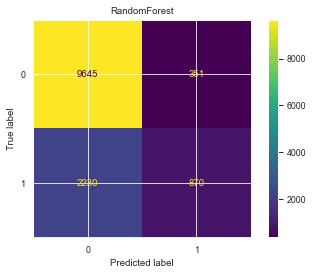

In [413]:
y_new_pred_rf_clf = rf_clf.predict(X)


clf_metrics_rf_clf_new = {
                        "Accuracy Score": accuracy_score(y, y_new_pred_rf_clf),
                        "Precision Score": precision_score(y, y_new_pred_rf_clf),
                        "Recall Score": recall_score(y, y_new_pred_rf_clf),
                        "F1 Score" : f1_score(y, y_new_pred_rf_clf),
                        "Auc Score": roc_auc_score(y, y_new_pred_rf_clf)
                  }
print(clf_metrics_rf_clf_new)
plot_confusion_matrix(rf_clf, X, y)
plt.title("RandomForest")
plt.show()



{'Accuracy Score': 0.8027642028100184, 'Precision Score': 0.7269534679543459, 'Recall Score': 0.2670967741935484, 'F1 Score': 0.39065817409766457, 'Auc Score': 0.6179921646077786}


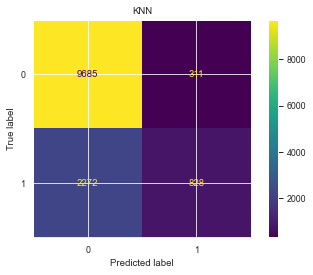

In [414]:
y_pred_knn_clf_new = knn_clf.predict(X)

clf_metrics_knn_clf_new  = {
                        "Accuracy Score": accuracy_score(y, y_pred_knn_clf_new ),
                        "Precision Score": precision_score(y, y_pred_knn_clf_new ),
                        "Recall Score": recall_score(y, y_pred_knn_clf_new ),
                        "F1 Score" : f1_score(y, y_pred_knn_clf_new ),
                        "Auc Score": roc_auc_score(y, y_pred_knn_clf_new )
                  }
print(clf_metrics_knn_clf_new )
plot_confusion_matrix(knn_clf, X, y)
plt.title("KNN")
plt.show()

{'Accuracy Score': 0.803069639584606, 'Precision Score': 0.7392102846648301, 'Recall Score': 0.25967741935483873, 'F1 Score': 0.38433993793268084, 'Auc Score': 0.6156330274045103}


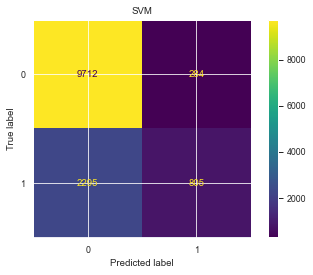

In [415]:
y_pred_svm_clf_new = svm_clf.predict(X)

clf_metrics_svm_clf_new = {
                        "Accuracy Score": accuracy_score(y, y_pred_svm_clf_new),
                        "Precision Score": precision_score(y, y_pred_svm_clf_new),
                        "Recall Score": recall_score(y, y_pred_svm_clf_new),
                        "F1 Score" : f1_score(y, y_pred_svm_clf_new),
                        "Auc Score": roc_auc_score(y, y_pred_svm_clf_new)
                  }
print(clf_metrics_svm_clf_new)
plot_confusion_matrix(svm_clf, X, y)
plt.title("SVM")
plt.show()

In [416]:
model_score_new = {}
df_knn_metrics_new = pd.DataFrame.from_dict(clf_metrics_knn_clf_new, orient='index')
df_knn_metrics_new.columns = ['knn']
model_score_new = df_knn_metrics_new


df_rf_metrics_new = pd.DataFrame.from_dict(clf_metrics_rf_clf_new, orient='index')
df_rf_metrics_new.columns = ['rf']


df_lr_metrics_new = pd.DataFrame.from_dict(clf_metrics_lr_new, orient='index')
df_lr_metrics_new.columns = ['lr']


df_svm_metrics_new = pd.DataFrame.from_dict(clf_metrics_svm_clf_new, orient='index')
df_svm_metrics_new.columns = ['svm']

model_score_new = pd.concat([model_score_new, df_lr_metrics_new,df_svm_metrics_new,df_rf_metrics_new],axis=1)
model_score_new


knn        lr       svm        rf
Accuracy Score   0.802764  0.793601  0.803070  0.802917
Precision Score  0.726953  0.666109  0.739210  0.712531
Recall Score     0.267097  0.256774  0.259677  0.280645
F1 Score         0.390658  0.370664  0.384340  0.402685
Auc Score        0.617992  0.608429  0.615633  0.622766